#Classification with Dimensionality Reduction
This data analysis worksheet is to practice working with Classification.

###Kaggle link to the dataset:
Company Bankruptcy Prediction https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction 

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clasification libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

##Load and Check Data 

In [ ]:
# This lne is to allow me to upload the csv file to google colab
from google.colab import files
upload = files.upload()

Saving data.csv to data.csv


In [ ]:
# The line to rename the uploaded file
cmbk_pred = pd.read_csv("data.csv", encoding = "unicode_escape")

In [ ]:
# This is to check that the data set has been imported correctly
cmbk_pred.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan Â¥),Operating Profit Per Share (Yuan Â¥),Per Share Net profit before tax (Yuan Â¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100

In [ ]:
# Getting info on the data set that is stored
cmbk_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

###Ticks Graph?

In [ ]:
# Still nuh kno wah dis needed fah but whatever 5:45 - 7:53
sns.set(style = "ticks")
sns.pairplot(cmbk_pred, hue = "Bankrupt?")
plt.title("Bankrupcy")

KeyboardInterrupt: ignored

#EDA
##This should check for:

*   X and Y relationships
*   Amounts
*   Distribrutions
*   Proportions
*   Correlations
*   Uncertainty







In [ ]:
# Getting the different values, like min, max, etc.
cmbk_pred.describe().round(6).transpose()

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.226300e-02,1.767100e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ROA(C) before interest and depreciation before interest,6819.0,5.051800e-01,6.068600e-02,0.0,4.765270e-01,5.027060e-01,5.355630e-01,1.000000e+00
ROA(A) before interest and % after tax,6819.0,5.586250e-01,6.562000e-02,0.0,5.355430e-01,5.598020e-01,5.891570e-01,1.000000e+00
ROA(B) before interest and depreciation after tax,6819.0,5.535890e-01,6.159500e-02,0.0,5.272770e-01,5.522780e-01,5.841050e-01,1.000000e+00
Operating Gross Margin,6819.0,6.079480e-01,1.693400e-02,0.0,6.004450e-01,6.059970e-01,6.139140e-01,1.000000e+00
Realized Sales Gross Margin,6819.0,6.079290e-01,1.691600e-02,0.0,6.004340e-01,6.059760e-01,6.138420e-01,1.000000e+00
Operating Profit Rate,6819.0,9.987550e-01,1.301000e-02,0.0,9.989690e-01,9.990220e-01,9.990950e-01,1.000000e+00
Pre-tax net Interest Rate,6819.0,7.971900e-01,1.286900e-02,0.0,7.973860e-01,7.974640e-01,7.975790e-01,1.000000e+00
After-tax net Interest Rate,6819.0,8.090840e-01,1.360100e-02,0.0,8.093120e-01,8.093750e-01,8.094690e-01,1.000000e+00
Non-industry income and expenditure/revenue,6819.0,3.036230e-01,1.116300e-02,0.0,3.034660e-01,3.035250e-01,3.035850e-01,1.000000e+00


In [ ]:
# Here it's finding the missing values, features and unique values
print("\nFeature: \n", cmbk_pred.columns.tolist())
print("\n Missing Values: \n", cmbk_pred.isnull().sum().values.sum())
print("\nUniuqe Values: \n", cmbk_pred.nunique()) 
pd.options.display.max_rows = 999


Feature: 
 ['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan Â¥)', ' Operating Profit Per Share (Yuan Â¥)', ' Per Share Net profit before tax (Yuan Â¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net

In [ ]:
# Correlation table
cmbk_pred.corr().round(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan Â¥),Operating Profit Per Share (Yuan Â¥),Per Share Net profit before tax (Yuan Â¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.00,-0.26,-0.28,-0.27,-0.10,-0.10,-0.00,-0.01,-0.01,-0.02,-0.01,-0.01,-0.02,-0.07,-0.02,-0.11,-0.17,-0.17,-0.16,-0.22,-0.08,-0.00,-0.14,-0.20,-0.00,-0.02,-0.04,-0.04,-0.01,-0.04,0.07,-0.02,-0.05,-0.00,0.03,-0.00,0.01,0.25,-0.25,0.02,...,-0.04,-0.10,-0.00,0.08,0.19,-0.08,-0.00,0.00,-0.02,-0.15,0.15,0.00,-0.22,-0.01,0.14,0.01,0.03,-0.00,-0.02,0.00,0.07,-0.02,0.15,0.14,-0.07,-0.04,-0.12,-0.06,0.17,0.14,-0.32,0.04,-0.01,-0.10,-0.18,0.17,0.01,-0.01,NaN,-0.08
ROA(C) before interest and depreciation before interest,-0.26,1.00,0.94,0.99,0.33,0.33,0.04,0.05,0.05,0.02,0.05,0.07,0.11,0.32,0.05,0.25,0.51,0.51,0.51,0.78,0.38,-0.02,0.69,0.75,0.00,0.04,0.12,0.12,0.03,0.02,-0.02,0.08,0.30,0.01,-0.03,0.00,-0.02,-0.26,0.26,0.00,...,0.10,0.24,-0.01,-0.05,-0.21,0.39,-0.00,0.01,0.05,0.10,-0.14,0.02,0.65,0.02,-0.30,0.01,-0.03,0.00,-0.03,0.01,-0.01,0.05,-0.14,-0.09,0.26,0.16,0.50,0.13,-0.16,-0.11,0.89,-0.07,0.01,0.33,0.27,-0.14,-0.02,0.01,NaN,0.05
ROA(A) before interest and % after tax,-0.28,0.94,1.00,0.96,0.33,0.32,0.03,0.05,0.05,0.03,0.05,0.08,0.08,0.29,0.05,0.23,0.53,0.53,0.53,0.76,0.33,-0.01,0.65,0.75,0.00,0.04,0.13,0.13,0.02,0.03,-0.06,0.08,0.26,0.01,-0.02,0.01,-0.01,-0.26,0.26,0.02,...,0.16,0.22,-0.01,-0.04,-0.19,0.35,-0.00,0.00,0.08,0.12,-0.13,0.02,0.72,0.03,-0.36,-0.00,-0.03,0.00,-0.03,0.01,-0.01,0.08,-0.13,-0.10,0.26,0.16,0.44,0.11,-0.20,-0.16,0.96,-0.10,0.01,0.33,0.29,-0.14,-0.01,0.01,NaN,0.06
ROA(B) before interest and depreciation after tax,-0.27,0.99,0.96,1.00,0.33,0.33,0.04,0.05,0.05,0.02,0.05,0.07,0.10,0.32,0.05,0.20,0.50,0.50,0.50,0.76,0.37,-0.01,0.66,0.72,0.00,0.04,0.12,0.12,0.02,0.02,-0.03,0.08,0.29,0.01,-0.02,0.01,-0.02,-0.26,0.26,0.00,...,0.09,0.23,-0.01,-0.04,-0.22,0.39,-0.00,0.01,0.05,0.10,-0.14,0.02,0.67,0.02,-0.32,-0.00,-0.03,0.00,-0.03,0.01,-0.01,0.05,-0

##Histograms: Distributions

In [ ]:
# Create Histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))


###Bar Graphis: Comparisons

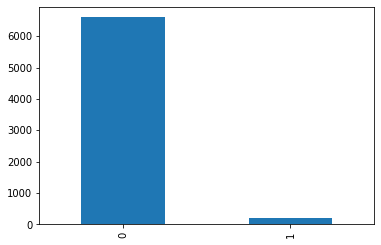

In [ ]:
# COmpareing the amount of companies that are bankrupt versus not.
cmbk_pred["Bankrupt?"].value_counts().plot(kind = "bar")

###Scatterplot: X and Y relationship

In [ ]:
# Show the relationship between the 

##Data Preprocessing & Fature Engineering

###Detecting Missing Data

In [ ]:
# Just replacing the any empty spaces with the word "NaN"
cmbk_pred = cmbk_pred.replace(" ", np.nan)
cmbk_pred.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan Â¥),Operating Profit Per Share (Yuan Â¥),Per Share Net profit before tax (Yuan Â¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100

### Treating Missing values

In [ ]:
# Show how many missing values in each category
print(cmbk_pred.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [ ]:
print("\nMissing values: ", cmbk_pred.isnull().sum().values.sum())


Missing values:  0


In [ ]:
# I think there are no missing values...........soooooo, less work for me?

### Detecting and Treating Duplicates

In [ ]:
# Just to find the size of the datasheet
cmbk_pred.shape

(6819, 96)

In [ ]:
# Finding the amount of duplicated rows
dup_r_cmbk_pred = cmbk_pred[cmbk_pred.duplicated()]
print("The number of rows duplicated are: ", dup_r_cmbk_pred.shape)

The number of rows duplicated are:  (0, 96)


In [ ]:
# Show the number of values present before dropping the duplicates
cmbk_pred.count()

Bankrupt?                                                   6819
 ROA(C) before interest and depreciation before interest    6819
 ROA(A) before interest and % after tax                     6819
 ROA(B) before interest and depreciation after tax          6819
 Operating Gross Margin                                     6819
 Realized Sales Gross Margin                                6819
 Operating Profit Rate                                      6819
 Pre-tax net Interest Rate                                  6819
 After-tax net Interest Rate                                6819
 Non-industry income and expenditure/revenue                6819
 Continuous interest rate (after tax)                       6819
 Operating Expense Rate                                     6819
 Research and development expense rate                      6819
 Cash flow rate                                             6819
 Interest-bearing debt interest rate                        6819
 Tax rate (A)            

In [ ]:
# Here I drop the duplicate rows
cmbk_pred = cmbk_pred.drop_duplicates()
cmbk_pred.head(6819)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan Â¥),Operating Profit Per Share (Yuan Â¥),Per Share Net profit before tax (Yuan Â¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,2.394682e-02,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.01154

##Feature Scaling

In [ ]:
# Import the Standard scaler thing
from sklearn.preprocessing import StandardScaler

In [ ]:
# Here I use the Standard scaler on the data set
scale = StandardScaler()
scale.fit(cmbk_pred)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Here I attach the tranforms scaled data set to the varible name (cmbk_pred_scale)
cmbk_pred_scale = scale.transform(cmbk_pred)

In [ ]:
# Show the scaled data
cmbk_pred_scale

array([[ 5.47681062e+00, -2.21790935e+00, -2.04579778e+00, ...,
        -9.89778602e-02,  0.00000000e+00, -6.22067292e-01],
       [ 5.47681062e+00, -6.73828192e-01, -3.11067861e-01, ...,
         3.64558703e-01,  0.00000000e+00, -5.35573366e-01],
       [ 5.47681062e+00, -1.30367191e+00, -9.08419781e-01, ...,
        -1.25015000e-01,  0.00000000e+00, -6.21959845e-01],
       ...,
       [-1.82588019e-01, -5.34844821e-01, -3.79194227e-01, ...,
        -1.51013169e-02,  0.00000000e+00,  1.00120640e+00],
       [-1.82588019e-01,  1.78751762e-02,  1.95942589e-02, ...,
        -4.27044097e-03,  0.00000000e+00, -7.13638449e-02],
       [-1.82588019e-01, -1.99838660e-01,  1.74955607e-01, ...,
        -1.44543493e-02,  0.00000000e+00,  3.72572884e+00]])

##Classification

In [ ]:
# I think this means that pandas ".iloc" expexts row_indexer, column_indexer (I am honestly confused)
X = cmbk_pred.drop("Bankrupt?", axis=1) #iloc[:,:-1].values

In [ ]:
y = cmbk_pred['Bankrupt?']

##Evaluate the Model

In [ ]:
# Test size specifies how much of the data you want to set aside for the testing set.
# Random_state parameter is just a random seed we can use.
# You can use it if you'd like to reproduce these specific results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [ ]:
print(X_train)
print(y_train)

       ROA(C) before interest and depreciation before interest  ...   Equity to Liability
6770                                           0.435967         ...              0.062338
5995                                           0.534149         ...              0.036878
208                                            0.440989         ...              0.022676
5515                                           0.533613         ...              0.033311
4566                                           0.480525         ...              0.025282
...                                                 ...         ...                   ...
4848                                           0.514162         ...              0.026896
6687                                           0.622288         ...              0.143685
3912                                           0.515868         ...              0.027233
3768                                           0.502559         ...              0.151909
5139      

In [ ]:
# Create a SVC model
SVC_model = SVC()

In [ ]:
SVC_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Now I try to use the fitted model to predict
SVC_pred = SVC_model.predict(X_test)

In [ ]:
# SVC Accuracy score
print(accuracy_score(SVC_pred, y_test))

0.9582111436950147


In [ ]:
# print a confusion matrix
print(confusion_matrix(SVC_pred, y_test))

[[1307   57]
 [   0    0]]


In [ ]:
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Attempting to fit the classifiers
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting and sotring that prediction in a variable
KNN_prediction = KNN_model.predict(X_test)

In [ ]:
# Now I check for accuracy
print(accuracy_score(KNN_prediction, y_test))

0.9552785923753666


In [ ]:
# Now I check the confusion matrix and classification report to see the performance of the predictions
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1360
           1       0.00      0.00      0.00         4

    accuracy                           0.96      1364
   macro avg       0.50      0.48      0.49      1364
weighted avg       0.99      0.96      0.97      1364



##Dimensionality Reduction

###Train and fit PCA Attempt 2 (Last attempt at DMR)

In [ ]:
# Import the pca libraries here
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
# Here I think I fit the data set to the pca?
pca.fit(cmbk_pred_scale)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Here I think the data is transformed and attatched to the name (x_pca)
x_pca_cmbk = pca.transform(cmbk_pred_scale)

In [ ]:
# Print the shape beforee transformation
cmbk_pred_scale.shape

(6819, 96)

In [ ]:
# Print the sahep after the transformation
x_pca_cmbk.shape

(6819, 2)

In [ ]:
cmbk_pred_scale

array([[ 5.47681062e+00, -2.21790935e+00, -2.04579778e+00, ...,
        -9.89778602e-02,  0.00000000e+00, -6.22067292e-01],
       [ 5.47681062e+00, -6.73828192e-01, -3.11067861e-01, ...,
         3.64558703e-01,  0.00000000e+00, -5.35573366e-01],
       [ 5.47681062e+00, -1.30367191e+00, -9.08419781e-01, ...,
        -1.25015000e-01,  0.00000000e+00, -6.21959845e-01],
       ...,
       [-1.82588019e-01, -5.34844821e-01, -3.79194227e-01, ...,
        -1.51013169e-02,  0.00000000e+00,  1.00120640e+00],
       [-1.82588019e-01,  1.78751762e-02,  1.95942589e-02, ...,
        -4.27044097e-03,  0.00000000e+00, -7.13638449e-02],
       [-1.82588019e-01, -1.99838660e-01,  1.74955607e-01, ...,
        -1.44543493e-02,  0.00000000e+00,  3.72572884e+00]])

In [ ]:
x_pca_cmbk

array([[-7.8053864 ,  0.51673827],
       [-3.179079  , -0.81965088],
       [-4.7827471 , -0.24431843],
       ...,
       [ 1.92528876, -1.68881147],
       [ 1.86199561, -0.3906505 ],
       [ 1.26071827, -2.33277531]])

Text(0, 0.5, 'Second principle comnpent')

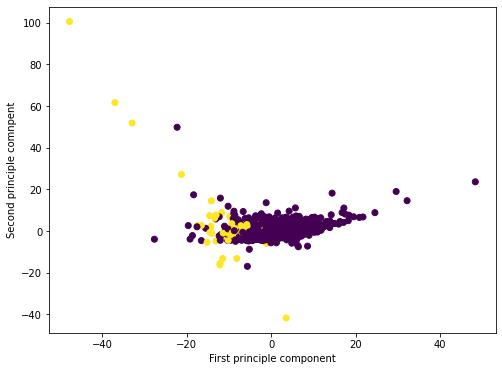

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(x_pca_cmbk[:,0], x_pca_cmbk[:,1], c = cmbk_pred["Bankrupt?"])
plt.xlabel("First principle component")
plt.ylabel("Second principle comnpent")

###Dimensionality Reduction attempt 2 (Data split into X and Y)

In [ ]:
#x = cmbk_pred.drop("Bankrupt?", axis = 1)
#y = cmbk_pred["Bankrupt?"]

In [ ]:
#x.shape

(6819, 95)

In [ ]:
#y.shape

(6819,)

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#np.random.seed(82) 
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

###Miss Jody's way of Demisionality reduction (IDEK)

In [ ]:
# Define x?
x = cmbk_pred.iloc[:, 1:]
x.head

<bound method NDFrame.head of        ROA(C) before interest and depreciation before interest  ...   Equity to Liability
0                                              0.370594         ...              0.016469
1                                              0.464291         ...              0.020794
2                                              0.426071         ...              0.016474
3                                              0.399844         ...              0.023982
4                                              0.465022         ...              0.035490
...                                                 ...         ...                   ...
6814                                           0.493687         ...              0.029890
6815                                           0.475162         ...              0.038284
6816                                           0.472725         ...              0.097649
6817                                           0.506264         ...   

In [ ]:
# Define y?
Y = cmbk_pred["Bankrupt?"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64

In [ ]:
# Creating the model to train?
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                     random_state=42)

In [ ]:
# Import the required sklearn libraries 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([0.13366614, 0.07267898])

In [ ]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.134 0.073]


In [ ]:
pd.DataFrame(np.round(pca.components_, 3), columns=x.columns).T

,0,1
ROA(C) before interest and depreciation before interest,0.236,0.072
ROA(A) before interest and % after tax,0.238,0.079
ROA(B) before interest and depreciation after tax,0.234,0.068
Operating Gross Margin,0.116,-0.017
Realized Sales Gross Margin,0.116,-0.018
Operating Profit Rate,0.013,0.022
Pre-tax net Interest Rate,0.021,0.021
After-tax net Interest Rate,0.020,0.019
Non-industry income and expenditure/revenue,0.009,-0.011
Continuous interest rate (after tax),0.019,0.020


In [ ]:
pca = PCA(n_components = None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.transform(X_train_sc)

array([[-1.17680659e+00,  2.53171472e-01,  1.74959265e+00, ...,
        -3.02467720e-16, -6.23020282e-17,  5.21384558e-17],
       [-2.02974385e-01,  8.42485616e-01, -3.10654269e+00, ...,
        -7.29907897e-16, -1.70213237e-16,  3.33439646e-17],
       [ 8.79019019e-01, -8.16802256e-01,  1.64249341e+00, ...,
         1.09029250e-16, -4.21158245e-16,  1.66478429e-16],
       ...,
       [-5.11632151e-02,  7.73222583e-01, -2.31807545e+00, ...,
        -5.23232048e-16, -2.41607449e-16, -3.92188264e-17],
       [ 3.92962080e+00,  5.17173302e-01, -2.05534089e-01, ...,
        -1.20950554e-15, -4.27776849e-17,  5.72774229e-17],
       [ 5.45202167e+00,  1.17379472e+00, -7.85966714e-02, ...,
         1.35176804e-16,  4.12172524e-16, -5.13335481e-17]])

#Fine Tune the Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe
Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer

In [ ]:
make_pipeline(Binarizer(), MultinomialNB())
Pipeline(steps=[('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())])

Pipeline(memory=None,
         steps=[('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)